#**Classification Model in Pytorch**

## **Dependencies**

In [1]:
from sklearn.datasets import make_circles
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## **Data Loading**

In [2]:
X,y=make_circles(n_samples=1500,noise=0.03,random_state=42)

In [3]:
circles=pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y})
circles.head()

,X1,X2,label
0,-0.792638,0.060171,1
1,0.356093,-0.686711,1
2,-0.882130,-0.363143,0
3,-0.953746,-0.279228,0
4,-0.848879,-0.616024,0


In [4]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

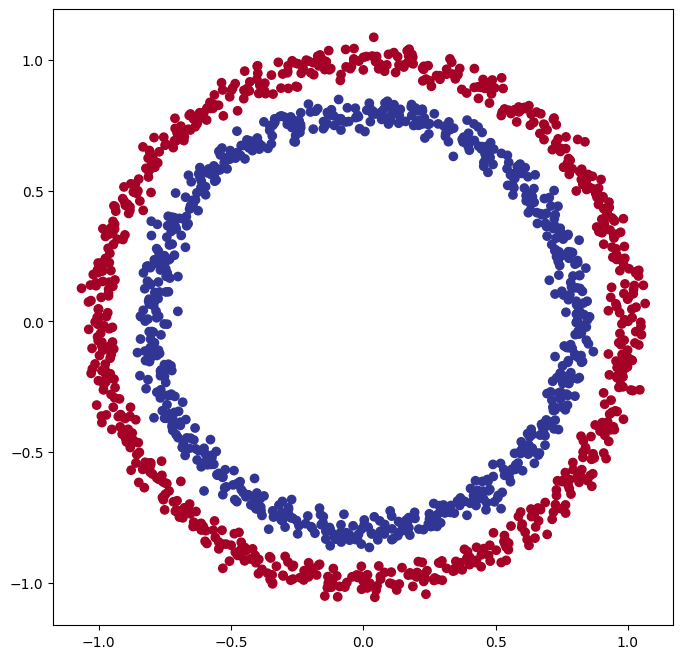

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y)

In [7]:
X_train,X_test,y_train,y_test=torch.tensor(X_train,dtype=torch.float).to(device),torch.tensor(X_test,dtype=torch.float).to(device),torch.tensor(y_train,dtype=torch.float).to(device),torch.tensor(y_test,dtype=torch.float).to(device)

In [8]:
y_train=y_train.unsqueeze(dim=1)
y_test=y_test.unsqueeze(dim=1)

In [9]:
model=nn.Sequential(
    nn.Linear(in_features=2,out_features=128),
    nn.Linear(in_features=128,out_features=256),
    nn.ReLU(),
    nn.Linear(in_features=256,out_features=1)
).to(device)

In [10]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0027,  0.4982],
                      [-0.4243,  0.5182],
                      [ 0.4964, -0.5072],
                      [-0.2501, -0.6268],
                      [ 0.4148,  0.0071],
                      [-0.0024,  0.2042],
                      [-0.1749,  0.3071],
                      [-0.3885,  0.1476],
                      [ 0.1762,  0.2639],
                      [-0.5349,  0.2325],
                      [-0.0440, -0.5285],
                      [ 0.5746,  0.3540],
                      [-0.2812,  0.2754],
                      [ 0.5320, -0.4564],
                      [-0.2624,  0.0087],
                      [-0.3764,  0.5905],
                      [ 0.0647, -0.3737],
                      [-0.6836,  0.5049],
                      [-0.1391,  0.6506],
                      [-0.1385,  0.1841],
                      [-0.5191, -0.5827],
                      [-0.5981,  0.0389],
                      [-0.1445,  0.5865],
        

In [11]:
model

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=1, bias=True)
)

In [12]:
## Training parameters and
epochs=1500
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)
def accuracy_fn(y_true,y_pred):
  match_count=0
  assert len(y_pred)==len(y_true)
  for i in range (len(y_pred)):
    if y_true[i]==y_pred[i]:
      match_count+=1
  return match_count/len(y_pred)*100

In [13]:
for epoch in range(epochs):
  model.train()
  y_logits=model(X_train)
  y_prob=torch.sigmoid(y_logits)
  y_pred=(y_prob >= 0.5).int()
  loss=loss_fn(y_logits,y_train)
  train_acc=accuracy_fn(y_pred=y_pred,y_true=y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch%100==0:
    model.eval()
    with torch.inference_mode():
      test_logits=model(X_test)
      test_prob=torch.sigmoid(test_logits)
      test_loss=loss_fn(test_logits,y_test)
      test_pred=(test_prob >= 0.5).int()
      test_acc=accuracy_fn(y_pred=test_pred,y_true=y_test)
      print(f"epoch{epoch} train_loss:{loss} train accuracy:{train_acc}% | test_loss:{test_loss} test accuracy:{test_acc}%")



epoch0 train_loss:0.6936708688735962 train accuracy:51.16666666666667% | test_loss:0.6955850124359131 test accuracy:51.33333333333333%
epoch100 train_loss:0.6842837333679199 train accuracy:56.333333333333336% | test_loss:0.6870642304420471 test accuracy:53.666666666666664%
epoch200 train_loss:0.6779538989067078 train accuracy:62.74999999999999% | test_loss:0.681634247303009 test accuracy:58.333333333333336%
epoch300 train_loss:0.67186439037323 train accuracy:74.16666666666667% | test_loss:0.6763768792152405 test accuracy:70.0%
epoch400 train_loss:0.6657687425613403 train accuracy:77.16666666666666% | test_loss:0.6710929274559021 test accuracy:73.0%
epoch500 train_loss:0.65952068567276 train accuracy:78.58333333333334% | test_loss:0.6657916307449341 test accuracy:76.33333333333333%
epoch600 train_loss:0.653279721736908 train accuracy:79.91666666666667% | test_loss:0.6604615449905396 test accuracy:79.33333333333333%
epoch700 train_loss:0.646735429763794 train accuracy:80.83333333333333% 

In [14]:
X_train.shape,y_train.shape

(torch.Size([1200, 2]), torch.Size([1200, 1]))

In [15]:
y_logits

tensor([[-0.1288],
        [-0.5205],
        [ 0.1765],
        ...,
        [ 0.3157],
        [ 0.1499],
        [ 0.0696]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [16]:
device

'cuda'

In [17]:
X_test.shape,y_test.shape

(torch.Size([300, 2]), torch.Size([300, 1]))

In [18]:
import numpy as np

In [19]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y."""
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


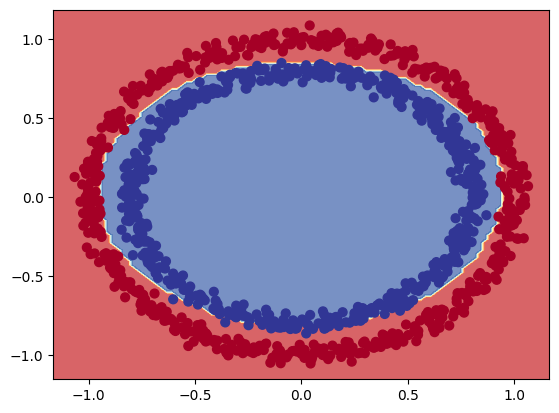

In [20]:
plot_decision_boundary(model=model,X=X_train,y=y_train)


In [22]:
line=torch.arange(-10,10,1)

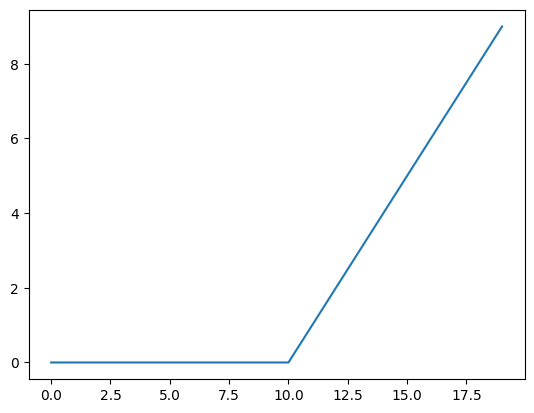

In [32]:
plt.plot(torch.relu(line))

In [33]:
torch.maximum(torch.tensor(0),torch.tensor(1))

tensor(1)